In [1]:
import pandas as pd

In [3]:
df = pd.read_csv(r"C:\Users\sherap\Desktop\data.csv")

In [6]:
df

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
5,5,183277,E. Hazard,27,https://cdn.sofifa.org/players/4/19/183277.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,91,Chelsea,...,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,€172.1M
6,6,177003,L. Modrić,32,https://cdn.sofifa.org/players/4/19/177003.png,Croatia,https://cdn.sofifa.org/flags/10.png,91,91,Real Madrid,...,84.0,60.0,76.0,73.0,13.0,9.0,7.0,14.0,9.0,€137.4M
7,7,176580,L. Suárez,31,https://cdn.sofifa.org/players/4/19/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,91,91,FC Barcelona,...,85.0,62.0,45.0,38.0,27.0,25.0,31.0,33.0,37.0,€164M
8,8,155862,Sergio Ramos,32,https://cdn.sofifa.org/players/4/19/155862.png,Spain,https://cdn.sofifa.org/flags/45.png,91,91,Real Madrid,...,82.0,87.0,92.0,91.0,11.0,8.0,9.0,7.0,11.0,€104.6M
9,9,200389,J. Oblak,25,https://cdn.sofifa.org/players/4/19/200389.png,Slovenia,https://cdn.sofifa.org/flags/44.png,90,93,Atlético Madrid,...,70.0,27.0,12.0,18.0,86.0,92.0,78.0,88.0,89.0,€144.5M


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
Unnamed: 0                  18207 non-null int64
ID                          18207 non-null int64
Name                        18207 non-null object
Age                         18207 non-null int64
Photo                       18207 non-null object
Nationality                 18207 non-null object
Flag                        18207 non-null object
Overall                     18207 non-null int64
Potential                   18207 non-null int64
Club                        17966 non-null object
Club Logo                   18207 non-null object
Value                       18207 non-null object
Wage                        18207 non-null object
Special                     18207 non-null int64
Preferred Foot              18159 non-null object
International Reputation    18159 non-null float64
Weak Foot                   18159 non-null float64
Skill Moves                 18159 non-null fl

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
df.drop(['Photo','Flag','Club Logo','Unnamed: 0'],axis=1,inplace=True)

In [25]:
df = df.loc[:,["Name","Age",'Nationality',"Overall","Potential","Club","Special","Preferred Foot","Wage","Value",
                    "International Reputation","Weak Foot",'Position',"Jersey Number"]]

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 14 columns):
Name                        18207 non-null object
Age                         18207 non-null int64
Nationality                 18207 non-null object
Overall                     18207 non-null int64
Potential                   18207 non-null int64
Club                        17966 non-null object
Special                     18207 non-null int64
Preferred Foot              18159 non-null object
Wage                        18207 non-null object
Value                       18207 non-null object
International Reputation    18159 non-null float64
Weak Foot                   18159 non-null float64
Position                    18147 non-null object
Jersey Number               18147 non-null float64
dtypes: float64(3), int64(4), object(7)
memory usage: 1.9+ MB


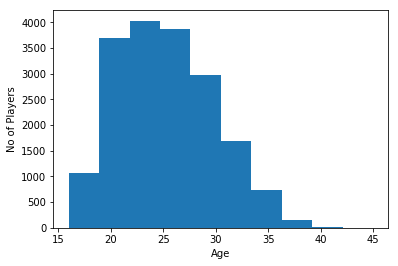

In [30]:
#Age Destribution of players
plt.hist(df.Age)
plt.xlabel('Age')
plt.ylabel('No of Players')
plt.show()

In [31]:
def value_extract(values):
    value = values.replace("€","")
    if 'M' in value:
        value = float(value.replace("M",""))*100000
    elif "K" in value:
        value = float(value.replace("K",""))*1000
    return float(value)

In [33]:
df.Value = df.Value.apply(lambda x : value_extract(x))
df.Wage = df.Wage.apply(lambda x : value_extract(x))

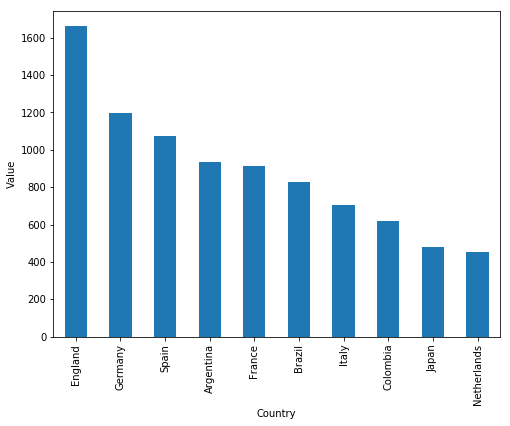

In [35]:
df.Nationality.value_counts()[:10].plot(kind='bar',figsize=(8,6))
plt.xlabel('Country')
plt.ylabel('Value')
plt.show()

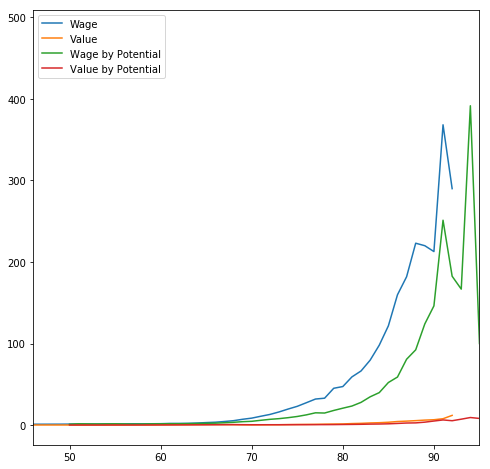

In [37]:
wage = df.groupby(['Overall'])["Wage"].mean()
value = df.groupby(["Overall"])["Value"].mean()

wage = wage.apply(lambda x : x/1000)
value = value.apply(lambda x : x/1000000)

df["Wage by Potential"] = df["Wage"]
df["Value by Potential"] = df["Value"]

wage_p = df.groupby("Potential")["Wage by Potential"].mean()
value_p = df.groupby("Potential")["Value by Potential"].mean()

wage_p = wage_p.apply(lambda x : x/1000)
value_p = value_p.apply(lambda x : x/1000000)

fife_overall = pd.concat([wage,value,wage_p,value_p],axis=1)
fife_overall.plot(figsize=(8,8))

  Preferred Foot          Wage          Value
0           Left  10348.373308  501810.733792
1          Right   9572.698595  470794.020648


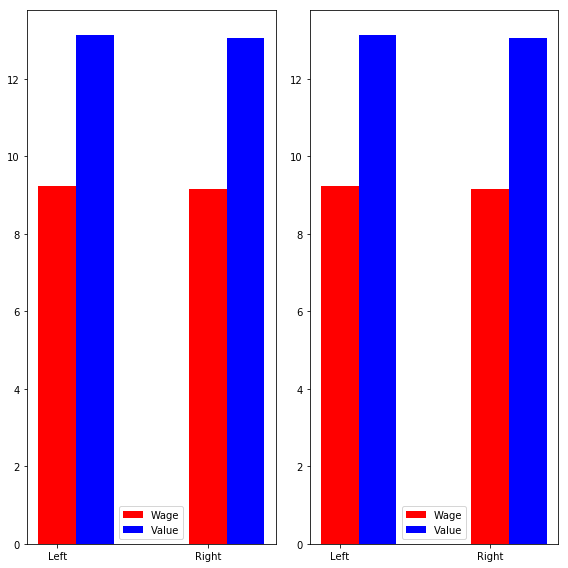

In [39]:
# We can see that left preferred foot player get more wage
import numpy as np
wa_val = df.groupby("Preferred Foot")[["Wage","Value"]].mean().reset_index()
print(wa_val)
width = 0.5
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.bar(np.arange(len(wa_val)),np.log(wa_val.Wage),0.25,label="Wage",color="r")
plt.bar(np.arange(len(wa_val))+.25,np.log(wa_val.Value),0.25,label = 'Value',color='b')
plt.legend(loc='best')
plt.xticks(np.arange(2),["Left","Right"])
plt.subplot(1,2,2)
plt.bar(np.arange(len(wa_val)),np.log(wa_val.Wage),0.25,label="Wage",color="r")
plt.bar(np.arange(len(wa_val))+.25,np.log(wa_val.Value),0.25,label = 'Value',color='b')
plt.legend(loc='best')
plt.xticks(np.arange(2),["Left","Right"])
plt.tight_layout()

In [40]:
#Expensive Player
df[df.Wage == df.Wage.max()]

,Name,Age,Nationality,Overall,Potential,Club,Special,Preferred Foot,Wage,Value,International Reputation,Weak Foot,Position,Jersey Number,Wage by Potential,Value by Potential
0,L. Messi,31,Argentina,94,94,FC Barcelona,2202,Left,565000.0,11050000.0,5.0,4.0,RF,10.0,565000.0,11050000.0


Text(0, 0.5, 'No. of Players(Over 85)')

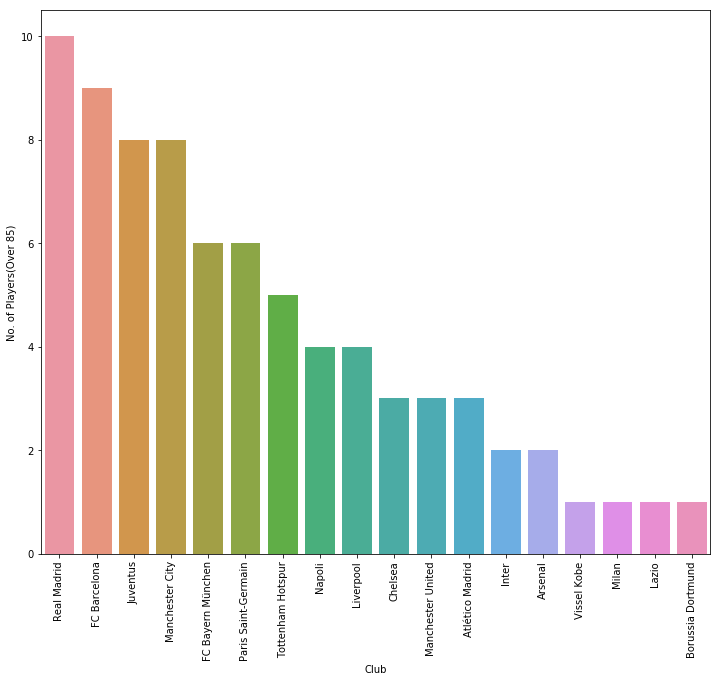

In [41]:
#Let's find the clubs with most player rating over 85
players = df[df.Overall > 85]
players = players.Club.value_counts()
plt.figure(figsize=(12,10))
sns.barplot(x=players.index,y=players.values)
plt.xticks(rotation=90)
plt.xlabel("Club")
plt.ylabel("No. of Players(Over 85)")